# Introduction to Comet ML

## Import libraries

In [1]:
import pandas as pd
import plotly.express as px
import sys
import warnings

sys.path.append('../../')
warnings.simplefilter(action='ignore', category=FutureWarning)

from comet_ml import Experiment
from DataScienceHelpers.ExploratoryDataAnalysis import display_histograms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler



## Set-up Comet ML

In [2]:
experiment = Experiment(
  api_key="POtvPasHuWR4enM1jereXupSx",
  project_name="medical-appointment",
  workspace="helios12"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/helios12/medical-appointment/0447be93d33843acb5f11cddea829b7f



## Loading data

In [3]:
df = pd.read_csv('../../data/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Visualization

### Distribution of features

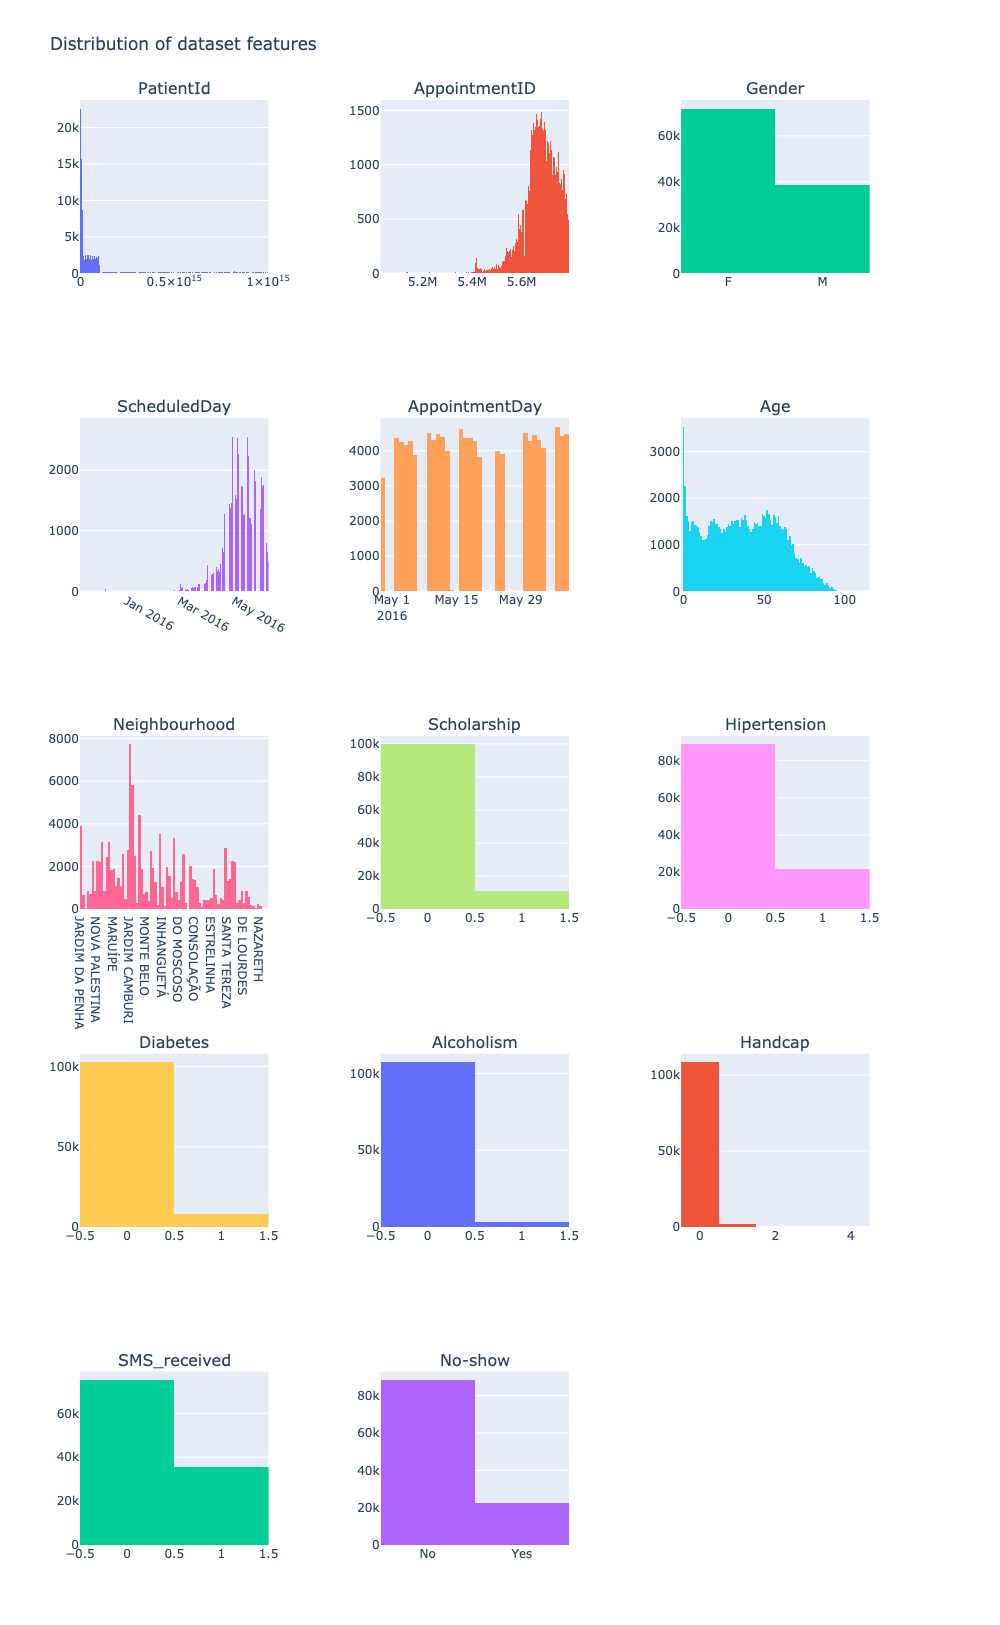

{'web': 'https://www.comet.com/api/image/download?imageId=648e88bdc8694e55be490777a51d2fd8&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=648e88bdc8694e55be490777a51d2fd8&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'imageId': '648e88bdc8694e55be490777a51d2fd8'}

In [4]:
fig = display_histograms(
    df, 
    cols=3, 
    row_height=325, 
    title='Distribution of dataset features'
)
experiment.log_figure(figure=fig)

### Analysis of people of each age

#### Finding and deleting of outliers

In [5]:
print(f'Unique values in the \'Age\' column: {df['Age'].unique()}')

Unique values in the 'Age' column: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [6]:
df = df[(df['Age']>=0) & (df['Age']<=110)]
df['Age'].value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

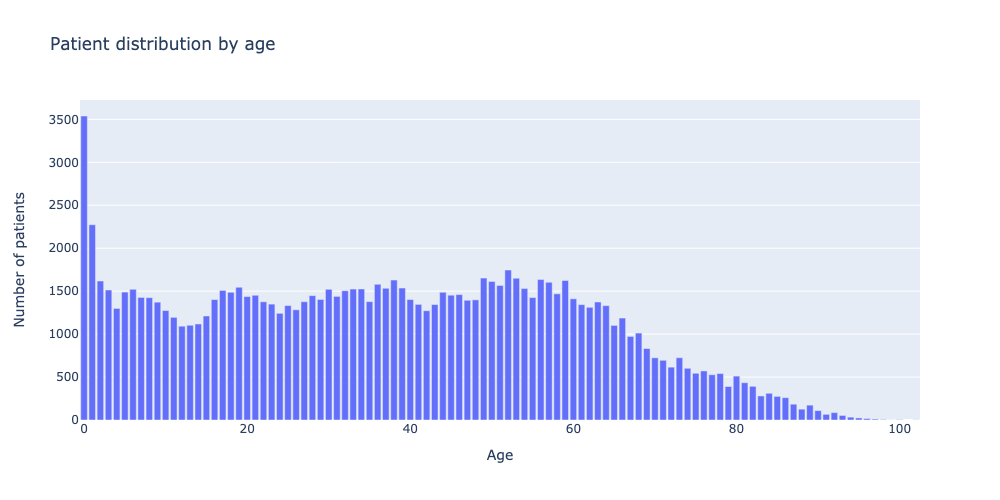

{'web': 'https://www.comet.com/api/image/download?imageId=075fb994d5d74275ab624bfcffa25bf8&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=075fb994d5d74275ab624bfcffa25bf8&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'imageId': '075fb994d5d74275ab624bfcffa25bf8'}

In [7]:
fig = px.bar(
    df['Age'].value_counts(),
    width=1000,
    height=500,
    title='Patient distribution by age'
).update_layout(
    yaxis_title='Number of patients',
    showlegend=False
)
fig.show('png')
experiment.log_figure(figure=fig)

### Visualizing correlation between 7 numeric features

Correlation between the following numerci features will be visualized: 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' and 'SMS_received'.

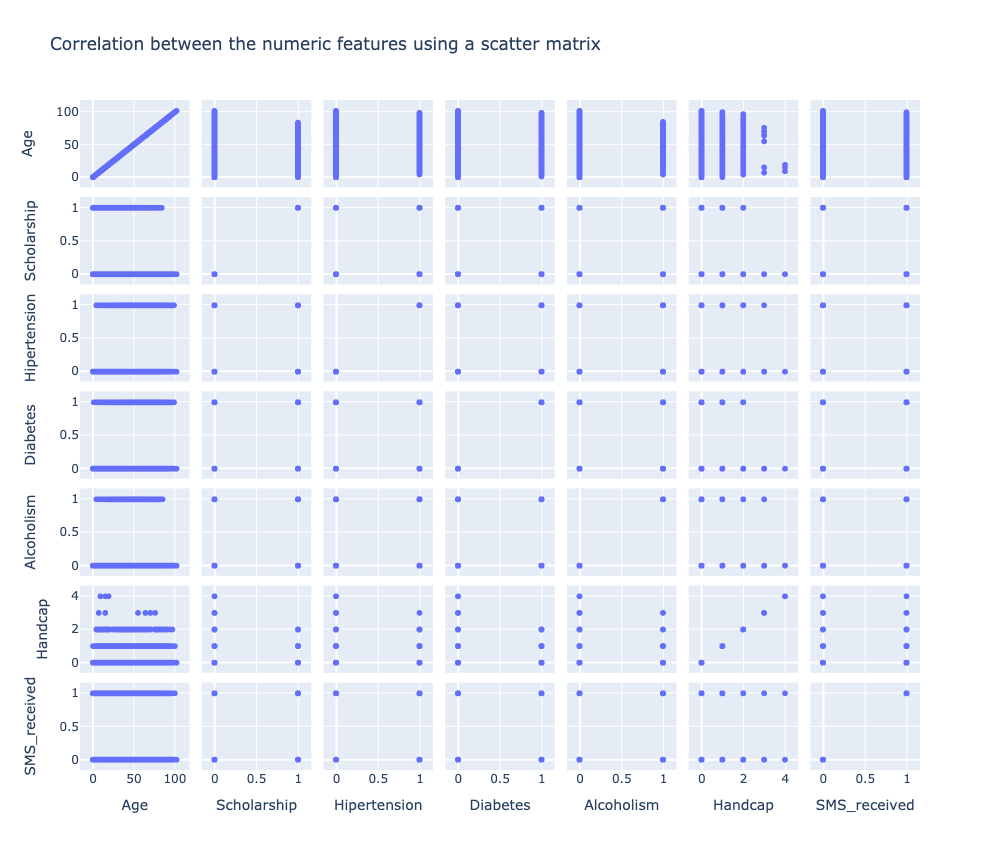

{'web': 'https://www.comet.com/api/image/download?imageId=bdf9b1f6d200440a92d02da8673d5a05&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=bdf9b1f6d200440a92d02da8673d5a05&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'imageId': 'bdf9b1f6d200440a92d02da8673d5a05'}

In [8]:
fig = px.scatter_matrix(
    df,
    dimensions=['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'],
    width=1000,
    height=850,
    title='Correlation between the numeric features using a scatter matrix'
)
fig.show('png')
experiment.log_figure(figure=fig)

Correlation visualization does not give any meaningful representatoin of the correlation. Let's try a visulization using a heatmap. I'll use the Kendall method to calculate correlation, since it better fits for binary and categorical values.

In [9]:
df_corr = df.loc[:, ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].corr(method='kendall')
df_corr

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.074029,0.413550,0.241074,0.084055,0.064490,0.012656
Scholarship,-0.074029,1.000000,-0.019731,-0.024899,0.035019,-0.009013,0.001188
Hipertension,0.413550,-0.019731,1.000000,0.433096,0.087972,0.084978,-0.006309
Diabetes,0.241074,-0.024899,0.433096,1.000000,0.018471,0.059252,-0.014555
Alcoholism,0.084055,0.035019,0.087972,0.018471,1.000000,0.003746,-0.026151
Handcap,0.064490,-0.009013,0.084978,0.059252,0.003746,1.000000,-0.025049
SMS_received,0.012656,0.001188,-0.006309,-0.014555,-0.026151,-0.025049,1.000000


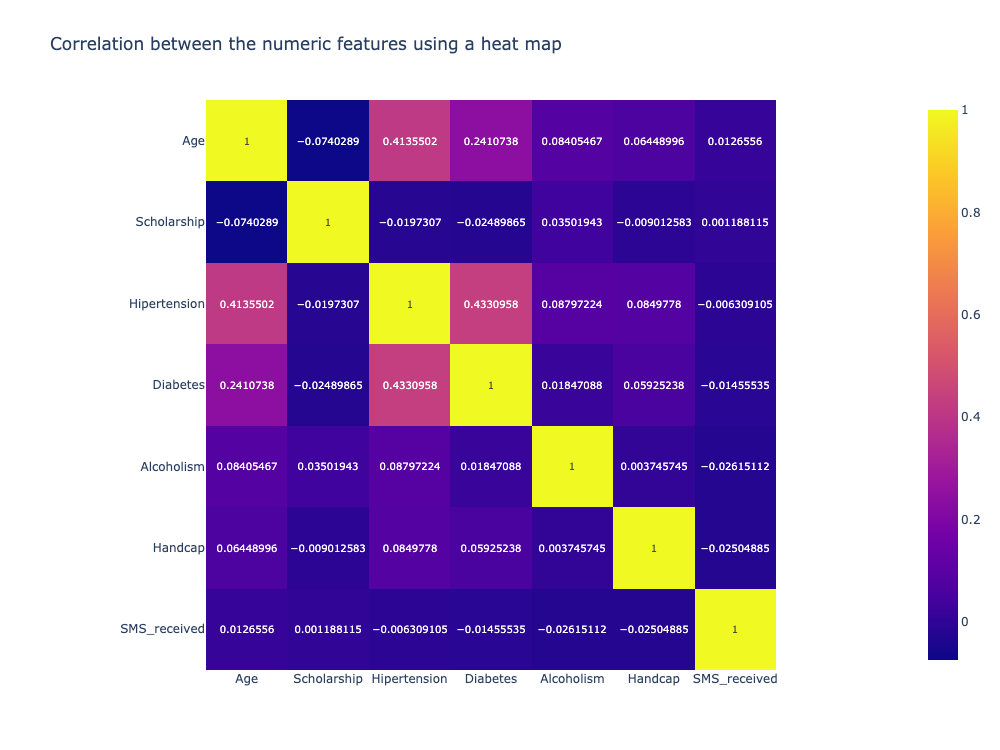

{'web': 'https://www.comet.com/api/image/download?imageId=563bf7960df84dbbaf8ff5bd0ee9bc8a&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=563bf7960df84dbbaf8ff5bd0ee9bc8a&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'imageId': '563bf7960df84dbbaf8ff5bd0ee9bc8a'}

In [10]:
fig = px.imshow(
    df_corr,
    text_auto=True,
    width=1000,
    height=750,
    title='Correlation between the numeric features using a heat map'
)
fig.show('png')
experiment.log_figure(figure=fig)

We can see that the highest correlation is observed in the following pairs: hipertension-diabetes and age-hipertension.

## Will a patient show-up to the appointment?

### Checking for empty values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


There are no empty values in the dataset.

### Encoding of categorical features

In [12]:
categorical_col_names = ['Gender', 'Neighbourhood']
encoded_cols = pd.get_dummies(df, columns=categorical_col_names)
encoded_cols.drop(
    ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'No-show'], 
    axis=1, 
    inplace=True
)
encoded_cols

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,0,0,0,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,62,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,0,1,1,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110523,51,0,0,0,0,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110524,21,0,0,0,0,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110525,38,0,0,0,0,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Encode the target variable 'No-show'

In [13]:
y = df['No-show']
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [14]:
y = y.replace({'Yes': 1, 'No': 0})
y.value_counts(normalize=True)

No-show
0    0.798084
1    0.201916
Name: proportion, dtype: float64

In [15]:
scaler = MinMaxScaler()
x = scaler.fit_transform(encoded_cols)

### Building a model

#### Initialize a model

In [16]:
logreg = LogisticRegression()
logreg.random_state = 42

#### Learning process

In [17]:
logreg.fit(x, y)

LogisticRegression(random_state=42)

#### Log learning parameters

In [18]:
params = {
    'random_state': logreg.random_state,
    'model_type': 'logreg'
}
experiment.log_parameters(params)

#### Model prediction

In [19]:
y_pred = logreg.predict(x)

#### Model analysis

In [20]:
accuracy = accuracy_score(y, y_pred)
print(f'Correct answers ratio: {accuracy:6.3f}')

Correct answers ratio:  0.798


#### Log metrics

In [21]:
metrics = {'accuracy': accuracy}
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(list(y), list(y_pred))

{'web': 'https://www.comet.com/api/asset/download?assetId=61aa062d6d11445cbdb059475525fb61&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=61aa062d6d11445cbdb059475525fb61&experimentKey=0447be93d33843acb5f11cddea829b7f',
 'assetId': '61aa062d6d11445cbdb059475525fb61'}

#### Notes to the model

I have received the same accuracy and confusion matrix as in the experiment of the author of the module. Unfortunately the author of the module does not troubleshoot the resulting model. The model predicted only 0 for all inputs and never predicted 1 (see the figure below and the timestamp 11:17 in the video of the unit). It would be good to understand why that happened and how to get 1 as preditions results.

![Confusion matrix](https://i.imgur.com/qlG4A9t.png)

In [22]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : capable_reveal_2101
COMET INFO:     url                   : https://www.comet.com/helios12/medical-appointment/0447be93d33843acb5f11cddea829b7f
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     max_iter          : 100
COMET INFO

TODO: add readme.md file for task-3

TODO: add info about task-3 to 2 readme.md files